# **Milling Machine Tool Wear Failure Prediction**

**Author: Jason Emmanuel**

Milling machines play a crucial role in various industrial operations, with their performance significantly impacting the overall productivity of a production line. These machines are used to cut, shape, and finish materials, ensuring that components meet precise specifications. However, one of the most common issues encountered in the operation of milling machines is tool wear. Tool wear refers to the gradual degradation of the tools used during machining processes, leading to reduced precision, poor-quality products, and, ultimately, tool failure if not addressed in a timely manner. This wear and tear can result in components that do not meet the required specifications, cause defects in the products, and increase the likelihood of sudden tool failure.

By implementing predictive maintenance strategies through machine learning models, manufacturers can anticipate when a tool is likely to fail based on historical sensor data and patterns of wear. These models analyze a variety of parameters such as air temperature, process temperature, rotational speed, torque, and the amount of tool wear, providing insights into the current state and future performance of the tools. This proactive approach can significantly reduce production downtime and maintenance costs, leading to more efficient and cost-effective manufacturing operations. Predictive maintenance allows for timely interventions before tool wear reaches critical levels, ensuring the continuous production of high-quality products and extending the lifespan of the tools used in milling machines.

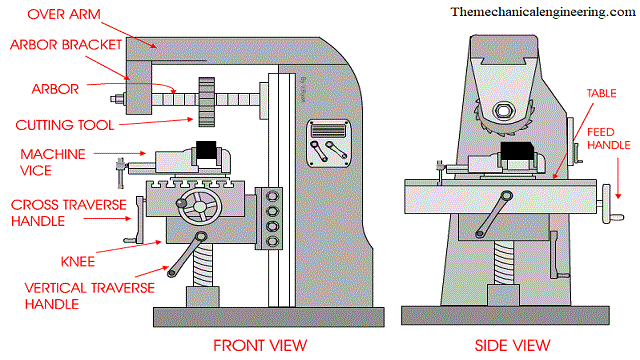

## **Objectives**

- Import Libraries & Load Data
- Select Features & Target
- Train-Test Data Split
- Data Preprocessing
- Modelling
- Get the Best Model
- Model Evaluation
- Feature Importance Visualization
- Model Testing with Failure Prediction in Samples
- Visualize One the Trees from the Random Forest


## **Step 1: Import Libraries & Load Data**

Importing libraries involves bringing in Python modules like **pandas**, which facilitates data manipulation and analysis through its DataFrame structure, and **numpy**, which supports efficient numerical computations. Additionally, **matplotlib** is utilized for data visualization, enabling the creation of insightful plots and graphs to understand the dataset's characteristics visually. Libraries from **sklearn** (Scikit-learn) are crucial for machine learning tasks, including **train_test_split** for dividing data into training and testing sets, **StandardScaler** for standardizing features to ensure uniformity and better model performance, **RandomForestClassifier** for building predictive models, and various metrics such as **classification_report**, **confusion_matrix**, and **roc_auc_score** for evaluating model performance.

Loading the dataset, from a CSV file using pd.read_csv(), brings the raw data into memory as a DataFrame in Python. This dataset comprises sensor readings from milling machines, such as air and process temperatures, rotational speed, torque, machine failure, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

df = pd.read_csv('ai4i2020.csv')

Here are 30 randomly selected rows from the dataset, providing an information into the sensor readings and operational parameters collected from the milling machine.

In [ ]:
display(df.sample(n=30))

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9392,9393,L56572,L,297.6,308.1,1437,46.3,149,0,0,0,0,0,0
1277,1278,M16137,M,298.2,309.4,1408,46.5,76,0,0,0,0,0,0
5074,5075,L52254,L,304.1,313.1,1666,34.6,33,0,0,0,0,0,0
3143,3144,H32557,H,300.6,310.0,1419,42.4,90,0,0,0,0,0,0
3232,3233,L50412,L,300.7,309.3,1580,38.3,102,0,0,0,0,0,0
3417,3418,L50597,L,301.6,310.6,1621,33.7,137,0,0,0,0,0,0
2575,2576,L49755,L,299.5,309.3,1422,49.2,179,0,0,0,0,0,0
3894,3895,M18754,M,302.3,311.2,1432,42.7,68,0,0,0,0,0,0
4088,4089,L51268,L,301.9,310.5,1477,42.4,128,0,0,0,0,0,0
990,991,L48170,L,296.2,307.0,1414,48.3,162,0,0,0,0,0,0


## **Step 2: Select Features & Target**

The selected features — **Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], and Tool wear [min]** — are indicators of the operational conditions and wear levels of the milling machine.

The target variable **'Machine failure'** serves as the center point of prediction. This binary target variable indicates whether a failure event has occurred during the milling process. It gives the outcome of interest, specifically identifying instances where the milling machine has experienced operational issues related to tool wear that may disrupt production or require immediate attention.

In [ ]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'

## **Step 3: Train-Test Data Split**

Dividing the dataset into two distinct subsets: the training set and the test set. The training set is used to train the machine learning model on historical data, allowing it to learn patterns and relationships between the input features (such as air temperature, process temperature, rotational speed, torque, and tool wear duration) and the target variable **('Machine failure')**.

Perform data splitting by allocate 80% of the data to the training set and 20% to the testing set. This division allows the model to learn patterns and relationships from a substantial portion of the data (training set), while still retaining enough unseen data (testing set) to evaluate its performance and generalization capabilities effectively.

In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 4: Data Preprocessing**

Preparing the data for modeling by transforming it into a standardized format. Scaling, such as using **StandardScaler**, ensures all features have a comparable scale, improving model performance. Additionally, techniques like **SMOTE** address class imbalance by generating synthetic samples of the minority class. These steps optimize data for accurate model training and prediction, enhancing the robustness and reliability of machine learning models in handling real-world datasets.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## **Step 5: Modelling**

In the modeling step of machine learning, the focus is on selecting an appropriate algorithm and optimizing its parameters to build an effective predictive model. Random Forest is the most optimal algoritm for this case due to its effectiveness in handling complex datasets and providing reliable predictions. In the context of milling machine, where multiple factors such as air and process temperatures, rotational speed, torque, and tool wear duration influence the occurrence of failures, Random Forest excels in capturing nonlinear relationships between these variables and failure outcomes.

Random Forest also have an ability to prevent overfitting, which is a common issue in machine learning models, by aggregating predictions from multiple decision trees trained on different subsets of the data.

Hyperparameter tuning is a vital part of this process. These parameters are set before the learning process begins and influence how the algorithm learns from the data. Techniques like grid search or randomized search are used to systematically explore different combinations of hyperparameters to find the optimal settings.

In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

## **Step 6: Get the Best Model**

Using the optimized machine learning model to make predictions on new data. First, **y_pred** captures the predicted class labels for the test dataset **X_test**. These labels indicate whether each instance in **X_test** is classified as a failure or non-failure based on the learned patterns from the training data.

Secondly, **y_prob** represents the predicted probabilities of each instance belonging to the positive class (in this case, tool wear failure). These probabilities offer a more nuanced understanding than simple class labels, providing insights into the model's confidence in its predictions.

In [ ]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

## **Step 7: Model Evaluation**

The **confusion matrix** provides a detailed summary of the model's predictions compared to the actual outcomes. It organizes predictions into categories like true positives, true negatives, false positives, and false negatives. This matrix is crucial for understanding the model's accuracy in differentiating between classes and identifying any biases or weaknesses.

The **classification report** offers a more diverse view by calculating metrics such as precision, recall, and F1-score for each class. Precision measures the accuracy of positive predictions, recall (or sensitivity) evaluates the proportion of actual positives correctly identified by the model, and F1-score provides a harmonic mean of precision and recall, offering a balanced assessment of the model's performance across classes.

Lastly, the **ROC-AUC score** (Receiver Operating Characteristic - Area Under the Curve) quantifies the model's ability to distinguish between classes. It plots the true positive rate against the false positive rate, illustrating the trade-off between sensitivity and specificity across various threshold settings. A higher ROC-AUC score (closer to 1) indicates better performance, with values above 0.5 suggesting the model's predictions are better than random guessing.



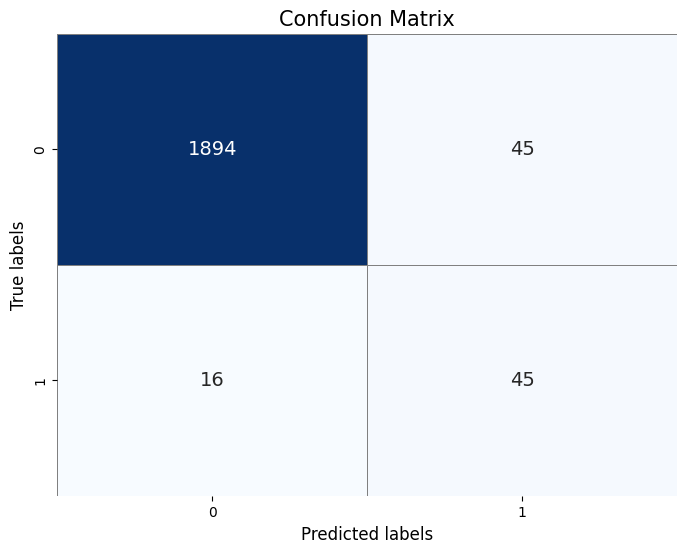

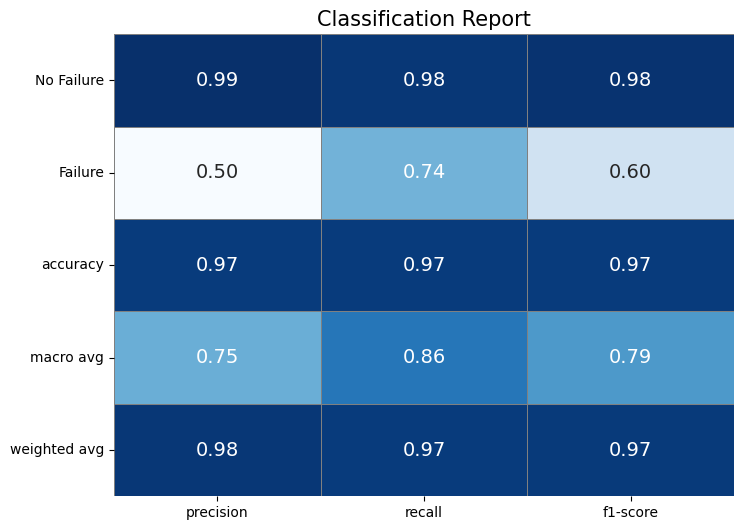

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

report = classification_report(y_test, y_pred, target_names=['No Failure', 'Failure'], output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.yticks(rotation=0)
plt.title('Classification Report', fontsize=15)
plt.show()


ROC-AUC Score:
0.9655771523262795


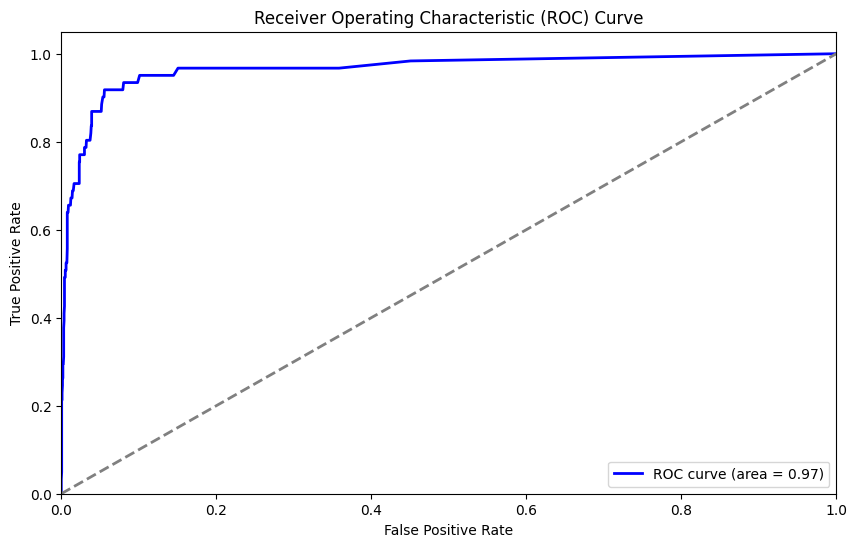

In [ ]:
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Model Evaluation Result Overview**

- **Overall Accuracy:** The model has a high overall accuracy of 97%, indicating that it correctly predicts the class labels for 97% of the instances.

- **Precision and Recall:** The precision for the "Failure" class is 0.50, meaning that 50% of the predicted failures are actual failures. The recall for the "Failure" class is 0.74, indicating that 74% of the actual failures are correctly identified by the model, which is considered relatively good.

- **F1-Score:** The F1-score for the "Failure" class is 0.60, which is a balance between precision and recall. While this is lower than for the "No Failure" class, it indicates that the model is effective in identifying failures, but with some trade-offs between precision and recall.

- **ROC-AUC Score:** A ROC-AUC score of 0.9656 is very high, indicating excellent difference between the "Failure" and "No Failure" classes. This suggests that the model performs well in distinguishing between the two classes overall.

- **ROC-AUC Curve:** The blue line (area = 0.97) shows how well the classifier can separate the positive class from the negative class across different decision thresholds. A steeper blue line towards the top-left corner indicates a better-performing classifier. The smoothness of the curve towards the right indicate how the classifier trades off between True Positives and False Positives.

## **Step 8: Feature Importance Visualization**

This step is to identifying which aspects of the data are most influential, thereby enhancing model interpretability. Feature importance visualization also can guide feature selection by highlighting less important features that might be removed to simplify the model without compromising performance. Ultimately, this visualization helps in making informed decisions about feature engineering and improving the overall model.


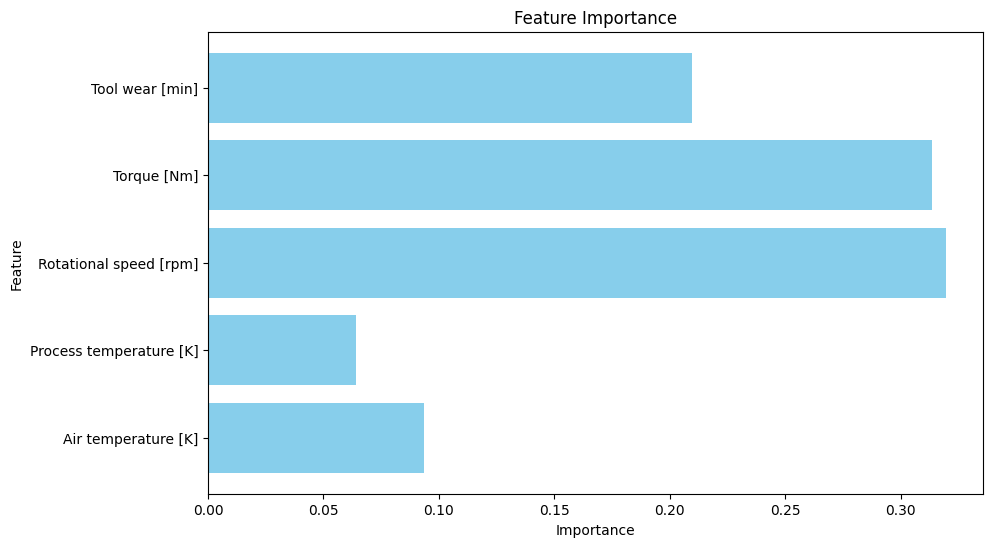

In [ ]:
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

**Feature Importance Graph Overview**

- **Rotational speed [rpm]:** This feature has the highest importance, indicating that the rotational speed of the milling machine is the most significant factor in predicting tool wear failure.

- **Torque [Nm]:** This feature is the second most important. It represents the torque applied during the milling process, which is crucial for understanding the stress and strain on the tool.

- **Tool wear [min]:** This feature ranks third in importance. It measures the wear of the tool over time, directly correlating with the likelihood of tool failure.

- **Air temperature [K]:** This feature has a moderate level of importance. The ambient air temperature can affect the cooling rate and overall temperature of the milling environment.

- **Process temperature [K]:** This feature is the least important among the ones listed but still contributes to the prediction model. The temperature during the milling process can affect the material properties and wear rate of the tool.

## **Step 9: Model Testing with Failure Prediction in Samples**

 This step includes predicting the probability of failure for each sample in the test dataset. The model assigns a probability score indicating the likelihood of tool wear failure for each sample. These predicted probabilities are used to conclude whether most of the milling machine have high probabilities to failed or not.

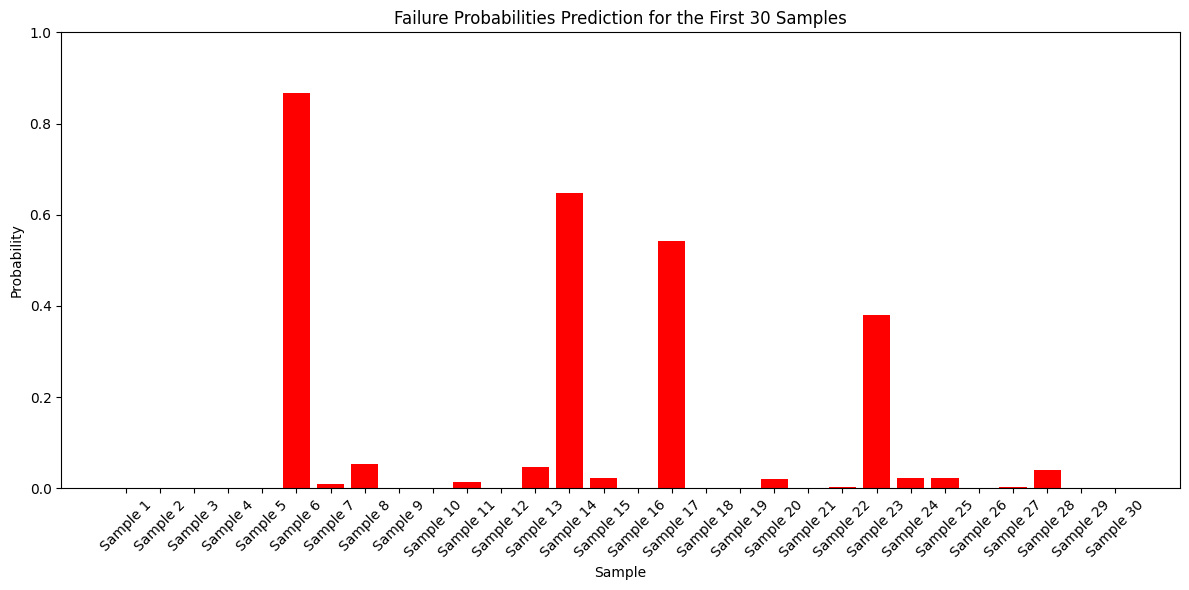

In [ ]:
y_prob_sample = y_prob[:30]

plt.figure(figsize=(12, 6))
plt.bar(range(1, 31), y_prob_sample, color='red')

plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Failure Probabilities Prediction for the First 30 Samples')
plt.ylim([0, 1])
plt.xticks(range(1, 31), [f"Sample {i+1}" for i in range(30)], rotation=45)

plt.tight_layout()
plt.show()

**Graph Overview**


**1. High Probability of Failure:**

- **Sample 6:** Nearly a 90% chance of failure, indicating urgent need for monitoring or replacement.
- **Sample 14:** About an 65% failure probability, requiring preemptive maintenance.
- **Sample 17:** Approximately 50% likelihood of failure, suggesting close monitoring.
- **Sample 23:** Around a 40% chance of failure, still significant and needing attention.

**2. Low Probability of Failure:**

- **Samples 1-5, 7-13, 15-16, 18-22, 24-30:** Very low failure probabilities, it's either 0% or close to 0%, suggesting minimal risk and routine maintenance suffices.

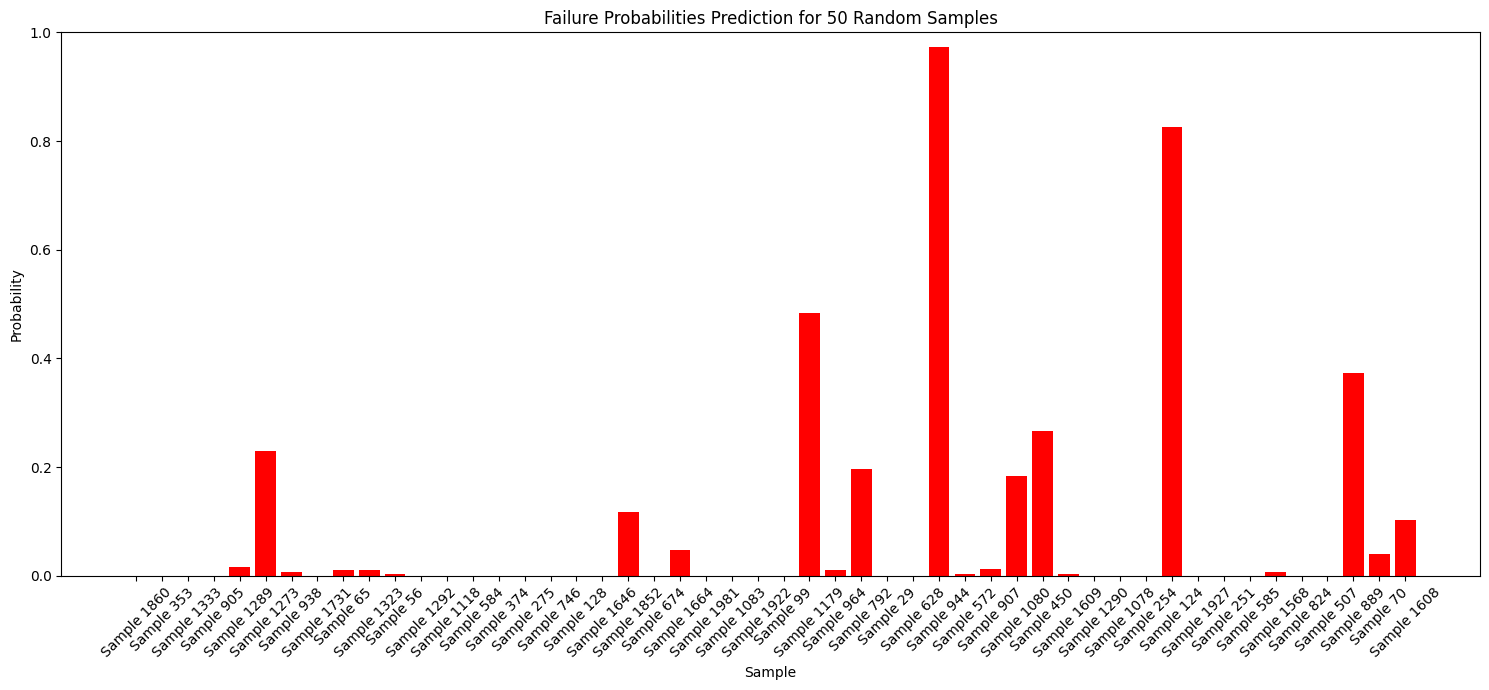

Number of samples with probability 0.0: 28
Number of samples with probability 0.10 or higher: 10
Number of samples with probability 0.25 or higher: 5
Number of samples with probability 0.50 or higher: 2


In [ ]:
np.random.seed(42)

random_indices = np.random.choice(len(y_prob), 50, replace=False)
y_prob_sample = y_prob[random_indices]

plt.figure(figsize=(15, 7))
plt.bar(range(1, 51), y_prob_sample, color='red')

plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Failure Probabilities Prediction for 50 Random Samples')
plt.ylim([0, 1])
plt.xticks(range(1, 51), [f"Sample {i}" for i in random_indices], rotation=45)

plt.tight_layout()
plt.show()

zero_prob_count = np.sum(y_prob_sample == 0.0)
print(f"Number of samples with probability 0.0: {zero_prob_count}")

high_prob_count_10 = np.sum(y_prob_sample >= 0.10)
print(f"Number of samples with probability 0.10 or higher: {high_prob_count_10}")

high_prob_count_25 = np.sum(y_prob_sample >= 0.25)
print(f"Number of samples with probability 0.25 or higher: {high_prob_count_25}")

high_prob_count_50 = np.sum(y_prob_sample >= 0.50)
print(f"Number of samples with probability 0.50 or higher: {high_prob_count_50}")

**Graph Overview**


**1. Samples with 0.0 Probability**

- **Number of samples:** 28

- **Description:** These samples have a zero probability of failure, indicating that they are predicted to have no risk of tool wear failure. These tools are in good condition and do not require immediate attention.

**2. Samples with Probability 0.10 or Higher**

- **Number of samples:** 10

- **Description:** These samples have a probability of failure of 10% or higher. They are at a moderate risk of failure and should be monitored more closely compared to those with zero probability. Regular checks and maintenance should be considered to ensure they do not develop issues.

**3. Samples with Probability 0.25 or Higher**

- **Number of samples:** 5

- **Description:** These samples show a higher risk of failure, with probabilities of 25% or more. They are significant enough to warrant preemptive maintenance. These tools should be prioritized for inspection and possible replacement or repair to prevent unexpected failures.

**4. Samples with Probability 0.50 or Higher**

- **Number of samples:** 2

- **Description:** These samples exhibit a high probability of failure, at 50% or more. They are at a critical risk and should be addressed immediately. Failing to maintain these tools can result in substantial downtime and possible damage to the machine and workpieces.

**Remarkable Samples**

- **Sample 944:** This sample has a failure probability close to 1.0, indicating an almost certain risk of tool wear failure. Immediate action is required for this sample to prevent imminent failure.
- **Sample 124:** This sample also has a high failure probability, around 0.85, suggesting a very high likelihood of failure.


The majority of the tools in the dataset are in good condition, with more than half of the samples showing no risk of failure. Specifically, 28 out of the 50 random samples analyzed have a 0.0 probability of tool wear failure. This indicates that current maintenance practices are effective in maintaining these tools, ensuring they continue to operate without significant issues.

However, a minority of samples present varying degrees of risk, ranging from moderate to critical. Among the 50 samples, 10 exhibit a failure probability of 0.10 or higher, indicating a moderate level of risk. These tools require closer monitoring and regular inspections to detect and address emerging issues promptly.

There's also 5 samples show a failure probability of 0.25 or higher, representing a more significant risk. Preemptive maintenance measures are recommended for these tools to prevent unexpected failures. Most concerning are the 2 samples with a failure probability of 0.50 or higher, indicating a critical risk. Immediate intervention is necessary for these tools to prevent imminent failure and minimize downtime.

**Several suggestions that can be given to company regarding predicted failure probabilities of 50 random samples:**

- **Preventive Maintenance Budget:** Allocate funds specifically for preventive and predictive maintenance activities, prioritizing based on risk levels.

- **Spare Parts Inventory:** Maintain a stock of spare parts for high and critical-risk tools to ensure quick repairs or replacements.

- **Enhanced Monitoring Systems:** Invest in IoT sensors and real-time data analytics for continuous tool condition monitoring.

- **Data-Driven Insights:** Regularly update predictive models with new data to refine maintenance schedules and practices.

- **Staff Training:** Train maintenance staff on predictive maintenance techniques and the importance of monitoring tools with varying risk levels.

- **Proactive Maintenance Culture:** Promote a culture in work environment that values proactive maintenance and early issue reporting.

- **Maintenance Scheduling:** Optimize maintenance schedules to coincide with planned downtimes or low-production periods.

- **Operational Contingencies:** Develop plans for unexpected tool failures, ensuring backup tools or machinery are available.

- **Regular Review Meetings:** Hold regular meetings to assess maintenance strategy effectiveness and update risk analytic.

## **Step 10: Visualize One the Trees from the Random Forest**

Visualizing one of the trees from the random forest is an important step to gain insights into the decision-making process of the model. Although a random forest consists of many trees, examining a single tree can provide a clearer understanding of how the model processes input features and makes predictions. This step enhances model interpretability by showing the structure of decision trees, illustrating the splits made based on different features and thresholds. Additionally, visualizing a tree can be educational, offering a tangible way to comprehend the underlying mechanics of decision trees. It also aids in debugging and validation, allowing us to verify that the tree is making logical and reasonable splits. Overall, this visualization helps demystify the complexity of the random forest model.

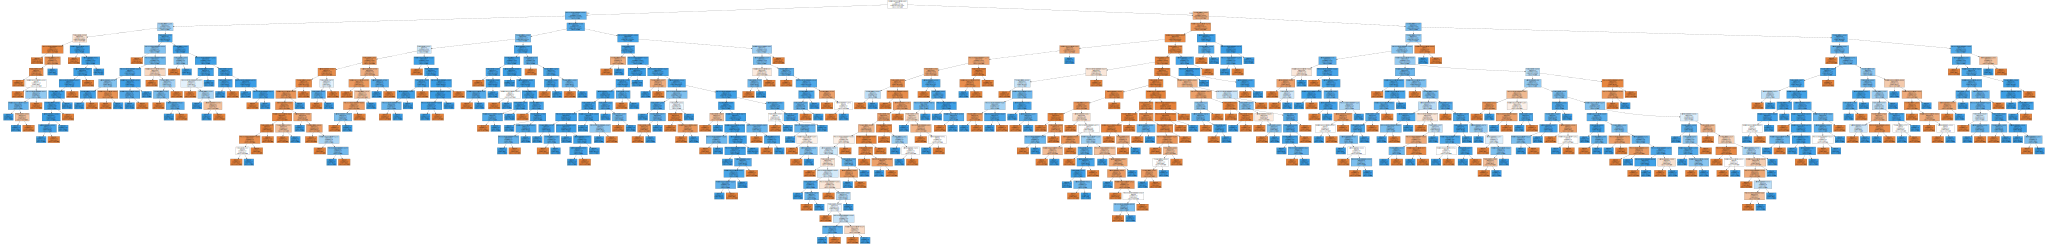

In [ ]:
tree = best_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=features,
                           class_names=['No Failure', 'Failure'],
                           filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("tree")
graph

**Features of the Displayed Tree**

**1. Color Coding:**

- Nodes are color-coded to indicate the predicted class.

- Blue nodes represent "no failure" class.

- Orange nodes represent "failure" class.

- The intensity of the color might indicate the purity of the node, with more intense colors showing higher purity (for example, more samples of a single class).

**2. Splitting Criteria:**

- Each node shows a feature and a threshold value used for splitting.

- For instance, a node might split the data based on whether a feature value is less than or greater than a certain threshold.

**3. Metrics:**

Nodes display metrics such as:

- Gini/Entropy: Measure of impurity used to select the best split.

- Samples: Number of samples that reach the node.

- Values: Distribution of samples across the classes at the node.

- Class: Predicted class at the node.

**Functioning of the Displayed Tree**

**1. Root Node Decision:**

- The root node makes the first split based on the most important feature.

- The decision rule directs the samples to the left or right child node based on the feature's value.

**2. Recursive Splitting:**

- Each child node applies a new decision rule, splitting the data further.

- This process continues until a stopping criterion is met (e.g., maximum tree depth, minimum number of samples at a node).

**3. Prediction:**

- For a new sample, the tree is traversed from the root to a leaf node following the decision rules at each node.

- The leaf node reached gives the prediction, which could be "wear failure" or "no wear failure."